# 13.3 项目实施

## 13.3.1 获取所有Live

<!doctype html>
<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="有问题，上知乎。知乎，可信赖的问答社区，以让每个人高效获得可信赖的解答为使命。知乎凭借认真、专业和友善的社区氛围，结构化、易获得的优质内容，基于问答的内容生产方式和独特的社区机制，吸引、聚集了各行各业中大量的亲历者、内行人、领域专家、领域爱好者，将高质量的内容透过人的节点来成规模地生产和分享。用户通过问答等交流方式建立信任和连接，打造和提升个人影响力，并发现、获得新机会。"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"
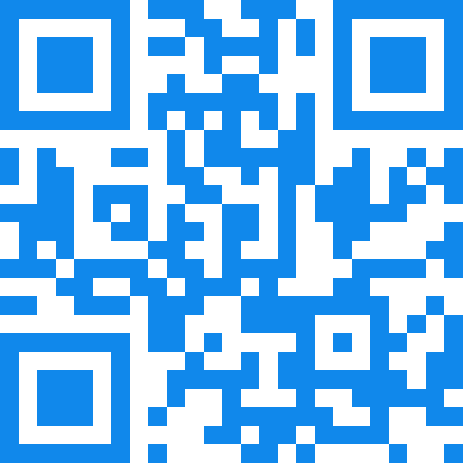

In [1]:
import requests

def scrapy(link):
    headers = {
        'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36'
    } 
    r = requests.get(link, headers= headers)
    return (r.text)

link = "https://www.zhihu.com/hot"
html = scrapy(link)
print (html)

In [3]:
import json
decodejson = json.loads(html)
next_page = decodejson['paging']['next']
is_end = decodejson['paging']['is_end']
print (next_page)
print (is_end)

http://api.zhihu.com/lives/homefeed?limit=10&offset=10
True


In [9]:
import requests
from pymongo import MongoClient
import json
import time
import random

#连接MongoDB
client = MongoClient('localhost',27017)
db = client.zhihu_database
collection = db.live

#定义爬虫函数
def scrapy(link):
    headers = {
        'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36'
    } 
    r = requests.get(link, headers= headers)
    return (r.text)

link = "https://api.zhihu.com/lives/homefeed?includes=live"
is_end = False
#循环获取所有Live
while not is_end:
    html = scrapy(link)
    decodejson = json.loads(html)
    collection.insert_one(decodejson)
    
    link = decodejson['paging']['next']
    is_end = decodejson['paging']['is_end']
    print (link, is_end)
    time.sleep(random.randint(2,3) + random.random())

https://api.zhihu.com/lives/homefeed?limit=10&offset=10 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=20 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=30 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=40 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=50 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=60 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=70 False
https://api.zhihu.com/lives/homefeed?limit=10&offset=80 True


## 13.3.2 获取Live的听众

In [10]:
from pymongo import MongoClient
client = MongoClient('localhost',27017)
db = client.zhihu_database
collection = db.live

first_page = collection.find_one()
for each in first_page['data']:
    print (each['live']['id'])

989811253094866944
812015618365743104
870704471959822336
826057084528394240
860165089880330240
835121024906432512
897097999497437184
850711363683770368
1045284726512451584
927876522726027264


In [11]:
import requests
from pymongo import MongoClient
import json
import time
import random

client = MongoClient('localhost',27017)
db = client.zhihu_database
    
live_id = '989811253094866944'

def get_audience(live_id):
    headers = {
        'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36'
    } 
    link = 'https://api.zhihu.com/lives/' + live_id + '/members?limit=10&offset=0'
    
    is_end = False
    while not is_end:
        r = requests.get(link, headers= headers)
        html = r.text
        decodejson = json.loads(html)
        decodejson['live_id'] = live_id
        db.live_audience.insert_one(decodejson)

        link = decodejson['paging']['next']
        is_end = decodejson['paging']['is_end']
        print(link, is_end)
        time.sleep(random.randint(2,3) + random.random())

get_audience(live_id)

https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=10 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=20 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=30 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=40 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=50 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=60 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=70 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=80 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=90 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=100 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=110 False
https://api.zhihu.com/lives/989811253094866944/members?limit=10&offset=120 False
https://api.zhihu.com/lives/989811253

KeyboardInterrupt: 

In [30]:
import requests
from pymongo import MongoClient
import json
import time
import random

client = MongoClient('localhost',27017)
db = client.zhihu_database

for each_page in db.live.find():
    for each in each_page['data']:
        live_id = each['live']['id']
        print (live_id)        
        get_audience(live_id)

840520148518592512
837669764146003968
837693085466107904
843124614065434624
842731562154987520
839869490635366400
839804209770692608
843110642910117888
840570499422650368
838157855663230976
840886183490912256
840879245080276992
837680104363679744
841344265740255232
842735083944308736
842735925179088896
839875793512456192
839859178712465408
835436065190993920
838163090607591424
841289257443274752
837679382431662080
838159504024682496
831457860721479680
840984548597714944
839864761947652096
833702327444725760
838388999964987392
835139866269474816
842740340824879104
819509716299436032
839869964864348160
837682828706746368
838405704879607808
827151989283635200
835125363007946752
836344346444967936
837373383242043392
835136598269112320
830380491126501376
835121024906432512
824618968198291456
831104976066609152


JSONDecodeError: Expecting value: line 1 column 1 (char 0)